# Data Processing - Data Visualization (DSC 530) Project

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np 
import zipfile
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')

from notebook.services.config import ConfigManager
cm = ConfigManager()

cm.update('livereveal', {
              'width': 1680,
              'height': 1050,
              'scroll': True,
})

{'width': 1680, 'height': 1050, 'scroll': True}

## Reading the datasets

The downloaded the datasets with the following resources:

 - Homicide dataset from https://ourworldindata.org/
 - Unemployment dataset from https://data.worldbank.org/

In [3]:
homicide_data = pd.read_csv("data/source/homicide_rate_unodc.csv")
homicide_data.head()

,Entity,Code,Year,"Homicide rate per 100,000 population - Both sexes - All ages"
0,Afghanistan,AFG,2009,4.071527
1,Afghanistan,AFG,2010,3.487093
2,Afghanistan,AFG,2011,4.208668
3,Afghanistan,AFG,2012,6.393913
4,Afghanistan,AFG,2015,9.975262


In [4]:
with zipfile.ZipFile('data/source/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5994651.zip', 'r') as zip_file:
    zip_file.extractall('data/source/unemployment_data')

In [5]:
raw_data = pd.read_csv("data/source/unemployment_data/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5994651.csv", skiprows=4)
raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.555646,6.707142,6.855589,6.940365,6.913046,7.121663,7.631304,7.920219,7.916835,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000,NaN


In [6]:
region_data = pd.read_csv("data/source/unemployment_data/Metadata_Country_API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_5994651.csv")
region_data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


## Preprocessing the Unemployment data

In [7]:
unemployment = pd.merge(region_data, raw_data, on=['Country Code'], how='inner')
unemployment.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,Country Name,Indicator Name,Indicator Code,1960,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN,Aruba,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN,Africa Eastern and Southern,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,...,6.555646,6.707142,6.855589,6.940365,6.913046,7.121663,7.631304,7.920219,7.916835,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN,Afghanistan,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,...,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN,Africa Western and Central,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,...,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN,Angola,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,...,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000,NaN


In [8]:
unemployment['Region'] = unemployment['Region'].fillna(unemployment['TableName'])

In [9]:
unemployment = unemployment.drop(['Country Code','IncomeGroup', 'SpecialNotes', 'TableName', 'Unnamed: 5', 'Unnamed: 67','Indicator Name','Indicator Code'], axis=1)

In [10]:
unemployment = unemployment.drop(unemployment.loc[:, '1960':'1990'].columns, axis = 1)

In [11]:
unemployment.head()

,Region,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Latin America & Caribbean,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,Africa Eastern and Southern,7.333336,7.318747,7.242705,7.160694,7.063796,7.055998,7.090541,7.060096,...,6.512784,6.555646,6.707142,6.855589,6.940365,6.913046,7.121663,7.631304,7.920219,7.916835
2,South Asia,Afghanistan,8.121000,8.168000,8.123000,8.111000,8.260000,8.165000,8.089000,8.082000,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
3,Africa Western and Central,Africa Western and Central,4.224595,4.335460,4.372125,4.366898,4.348996,4.379537,4.421117,4.454917,...,3.804447,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175
4,Sub-Saharan Africa,Angola,4.489000,4.487000,4.531000,4.395000,4.304000,4.274000,4.262000,4.234000,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000


## Drop the unnecessary columns

In [12]:
homicide_data_final = homicide_data.drop(['Code'], axis=1)

In [13]:
unemployment_data_final = unemployment

## Long to wide format

Convert the unemployment dataset from long to wide format using melt for easy merging with homicide dataset

In [14]:
unemployment_data_final = unemployment_data_final.melt(id_vars=["Country Name","Region"], var_name="Year")
unemployment_data_final.head()

,Country Name,Region,Year,value
0,Aruba,Latin America & Caribbean,1991,NaN
1,Africa Eastern and Southern,Africa Eastern and Southern,1991,7.333336
2,Afghanistan,South Asia,1991,8.121000
3,Africa Western and Central,Africa Western and Central,1991,4.224595
4,Angola,Sub-Saharan Africa,1991,4.489000


## Datatypes and Null values

In [15]:
homicide_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 3 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        4204 non-null   object 
 1   Year                                                          4204 non-null   int64  
 2   Homicide rate per 100,000 population - Both sexes - All ages  4204 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 98.7+ KB


In [16]:
unemployment_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8480 entries, 0 to 8479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  8480 non-null   object 
 1   Region        8480 non-null   object 
 2   Year          8480 non-null   object 
 3   value         7512 non-null   float64
dtypes: float64(1), object(3)
memory usage: 265.1+ KB


We can see that their are null values in **value** column and **Year** column is object data type for Unemployment dataset

Replace the null values with 0 and convert the year column into integer

In [17]:
unemployment_data_final['value'] = unemployment_data_final['value'].fillna(0)
unemployment_data_final["Year"] = unemployment_data_final["Year"].astype(int)

In [18]:
unemployment_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8480 entries, 0 to 8479
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  8480 non-null   object 
 1   Region        8480 non-null   object 
 2   Year          8480 non-null   int32  
 3   value         8480 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 232.0+ KB


## Rename the columns

In [19]:
unemployment_data_final = unemployment_data_final.rename(columns={"Country Name": "Entity", "value": "unemployment_rate"})
homicide_data_final = homicide_data_final.rename(columns={"Homicide rate per 100,000 population - Both sexes - All ages": "homicide_rate"})

## Removing countries with no data and Renaming the Country names

There are no countries with no data in Homicide dataset but in unemployment dataset we can see there are countries with no data. We are going to remove those countries

Rename the country names to correctly map the Entity columns from both datasets

In [20]:
unemployment_data_grouped = unemployment_data_final.groupby('Entity')

sum_by_category = unemployment_data_grouped['unemployment_rate'].sum()

filtered_sum_by_category = sum_by_category[sum_by_category > 0]

filtered_df = unemployment_data_final[unemployment_data_final['Entity'].isin(filtered_sum_by_category.index)]

unemployment_data_final = filtered_df.reset_index()
unemployment_data_final = unemployment_data_final.drop(['index'], axis = 1)

In [21]:
homicide_data_final['Entity'] = homicide_data_final['Entity'].replace('Africa (UN)', 'Africa')
homicide_data_final['Entity'] = homicide_data_final['Entity'].replace('Asia (UN)', 'Asia')
homicide_data_final['Entity'] = homicide_data_final['Entity'].replace('Europe (UN)', 'Europe')
homicide_data_final['Entity'] = homicide_data_final['Entity'].replace('Oceania (UN)', 'Oceania')
unemployment_data_final['Entity'] = unemployment_data_final['Entity'].replace('Russian Federation','Russia')

In [22]:
homicide_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4204 entries, 0 to 4203
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         4204 non-null   object 
 1   Year           4204 non-null   int64  
 2   homicide_rate  4204 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 98.7+ KB


In [23]:
unemployment_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             7520 non-null   object 
 1   Region             7520 non-null   object 
 2   Year               7520 non-null   int32  
 3   unemployment_rate  7520 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 205.8+ KB


In [24]:
country_mapping = unemployment_data_final[['Entity','Region']].drop_duplicates()

## Merging the data

In [25]:
final_data = pd.merge(unemployment_data_final, homicide_data_final, on=['Entity', 'Year'], how='inner')

In [26]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             3053 non-null   object 
 1   Region             3053 non-null   object 
 2   Year               3053 non-null   int32  
 3   unemployment_rate  3053 non-null   float64
 4   homicide_rate      3053 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 107.5+ KB


Filter for North and South America Countries

In [27]:
final_data['Region'].unique()

array(['Europe & Central Asia', 'East Asia & Pacific',
       'Latin America & Caribbean', 'South Asia', 'North America',
       'Middle East & North Africa', 'Sub-Saharan Africa', 'World'],
      dtype=object)

In [28]:
regions = ['North America', 'Latin America & Caribbean'] 
final_data = final_data[final_data['Region'].isin(regions)].reset_index(drop=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             715 non-null    object 
 1   Region             715 non-null    object 
 2   Year               715 non-null    int32  
 3   unemployment_rate  715 non-null    float64
 4   homicide_rate      715 non-null    float64
dtypes: float64(2), int32(1), object(2)
memory usage: 25.3+ KB


In [29]:
import pandas as pd

df = final_data

# Create a DataFrame with all combinations of Country and Year
countries = df['Entity'].unique()
years = df['Year'].unique()
all_combinations = pd.MultiIndex.from_product([countries, years], names=['Entity', 'Year'])
full_df = pd.DataFrame(index=all_combinations).reset_index()

# Merge the original DataFrame with the full DataFrame on Country and Year
merged_df = pd.merge(full_df, df, on=['Entity', 'Year'], how='left')
merged_df.fillna(0, inplace=True)  # Fill NaN values with 0

x = pd.merge(merged_df, country_mapping, on=['Entity'], how='left')

x = x.drop('Region_x', axis=1)

x.rename(columns = {'Region_y':'Region'}, inplace = True)


In [30]:
columns = ["Entity", "Region", "Year", "unemployment_rate", "homicide_rate"]
x = x[columns]

In [31]:
final_data = x

In [32]:
final_data.head()

,Entity,Region,Year,unemployment_rate,homicide_rate
0,Brazil,Latin America & Caribbean,1991,6.366,18.357327
1,Brazil,Latin America & Caribbean,1992,6.420,16.656002
2,Brazil,Latin America & Caribbean,1993,6.030,17.680256
3,Brazil,Latin America & Caribbean,1994,6.470,18.543499
4,Brazil,Latin America & Caribbean,1995,7.090,20.793213


In [33]:
final_data.to_csv('data/output/final_data.csv')

## Heatmap

Brazil


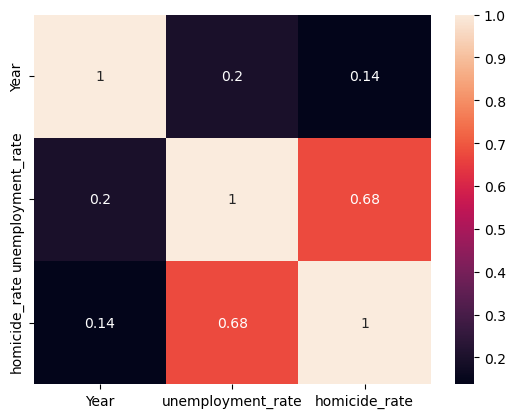

Barbados


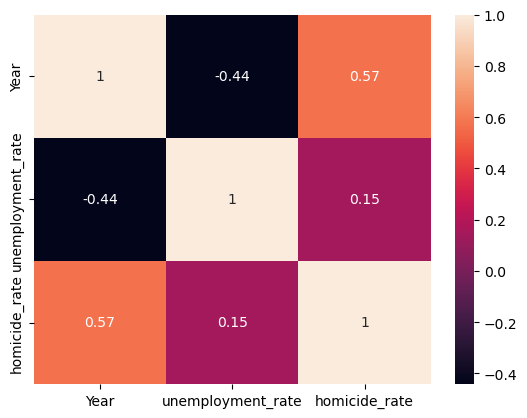

Canada


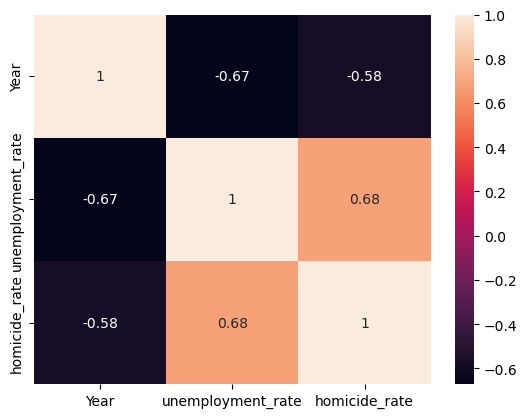

Colombia


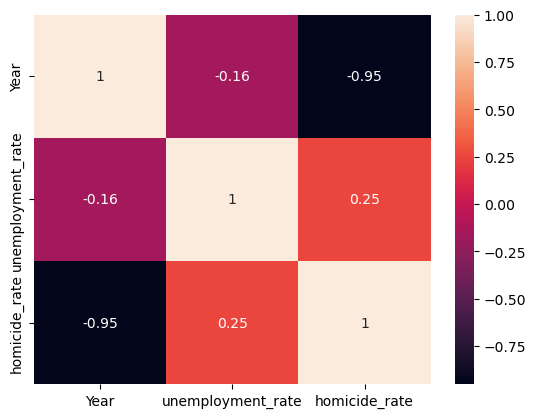

Costa Rica


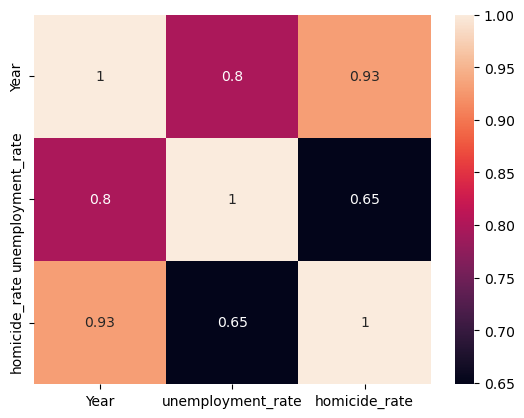

Dominican Republic


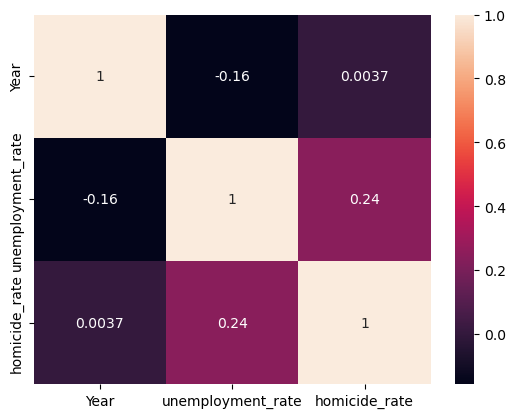

Ecuador


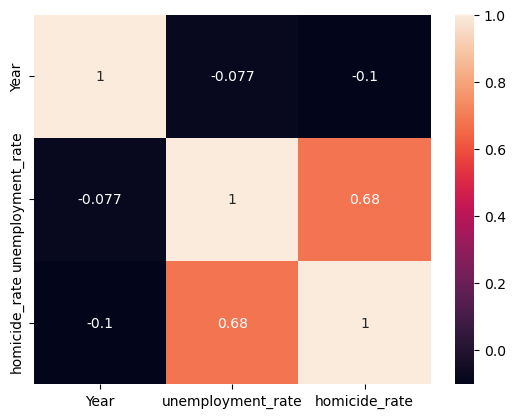

Guyana


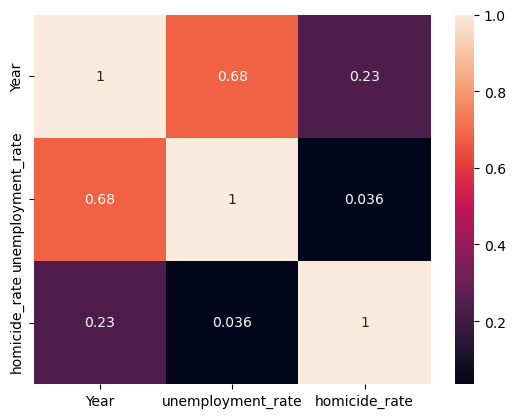

Honduras


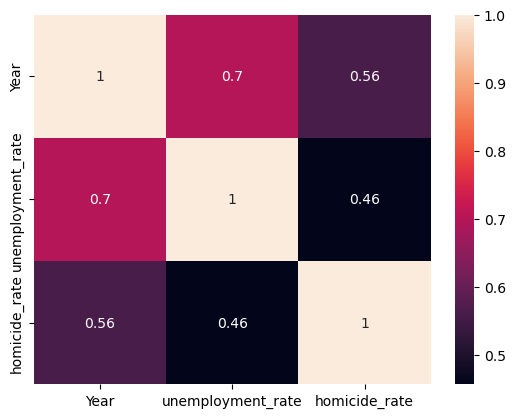

Jamaica


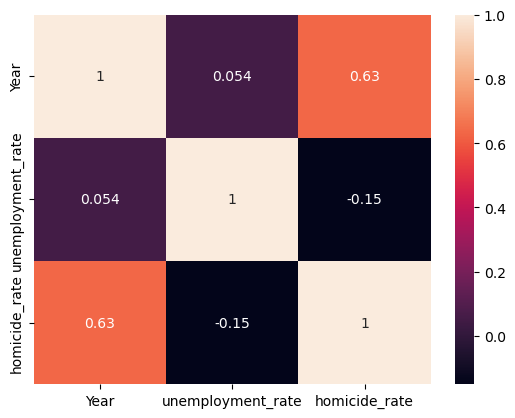

Mexico


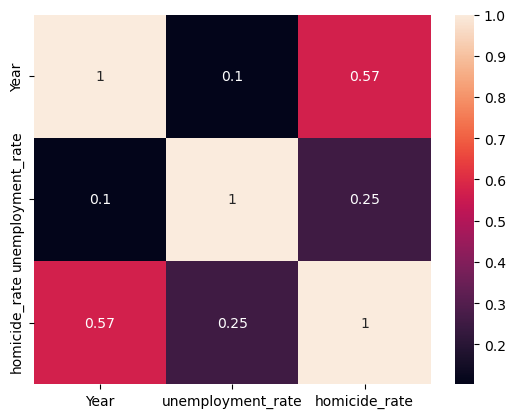

Nicaragua


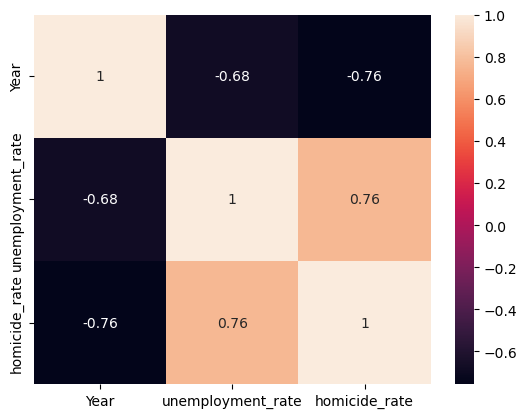

Panama


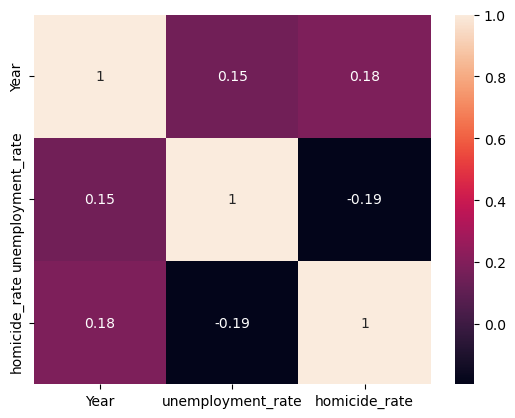

Puerto Rico


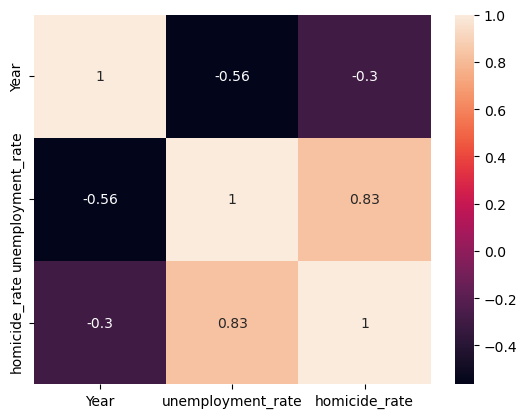

Uruguay


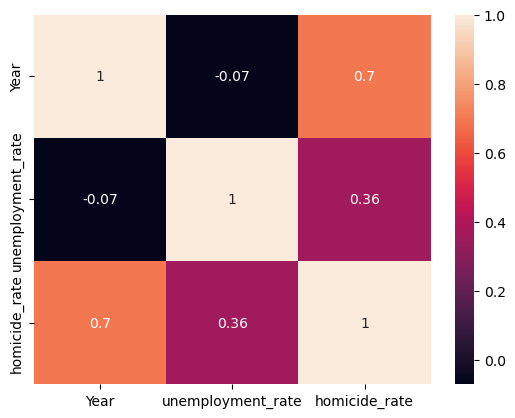

United States


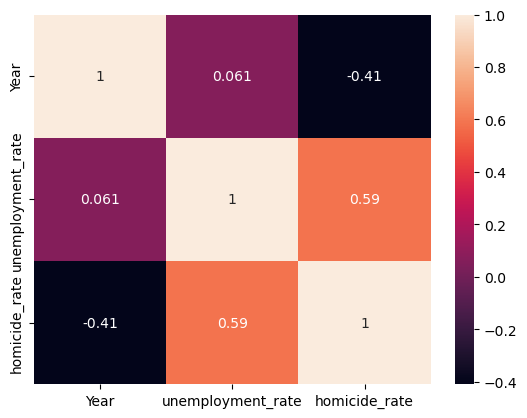

Cuba


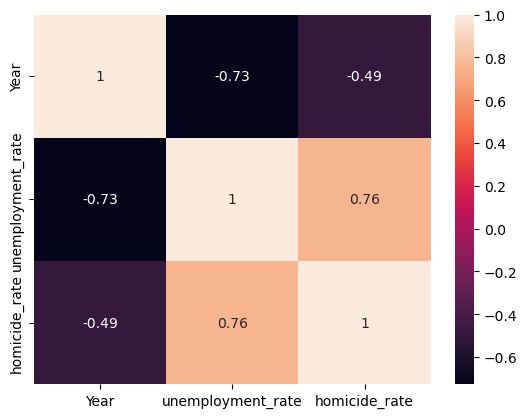

Guatemala


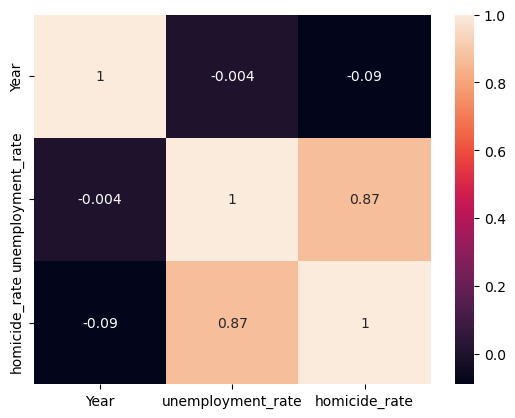

El Salvador


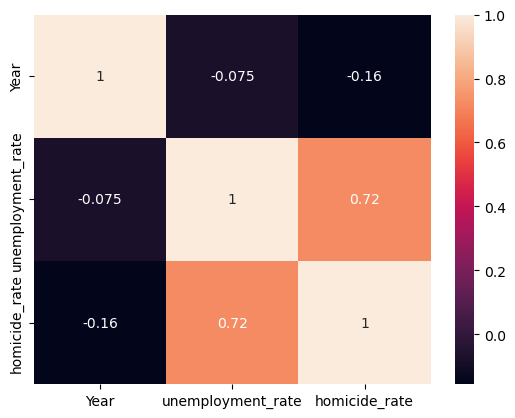

Belize


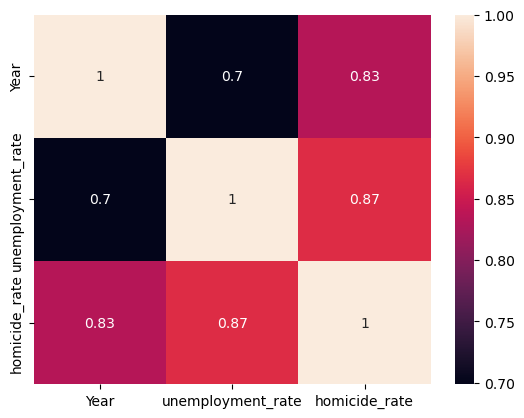

Paraguay


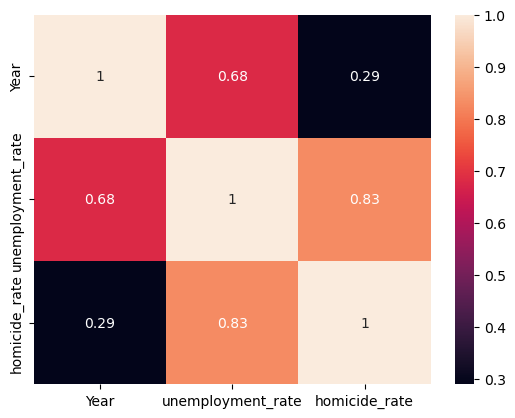

Suriname


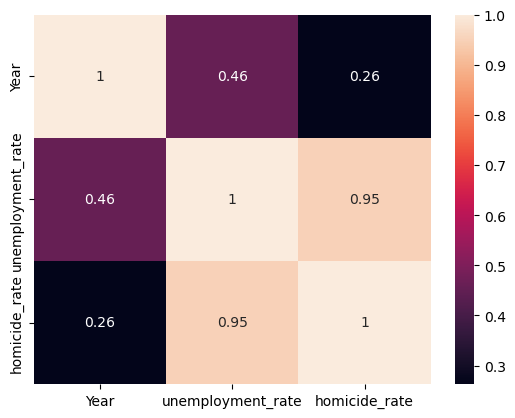

Trinidad and Tobago


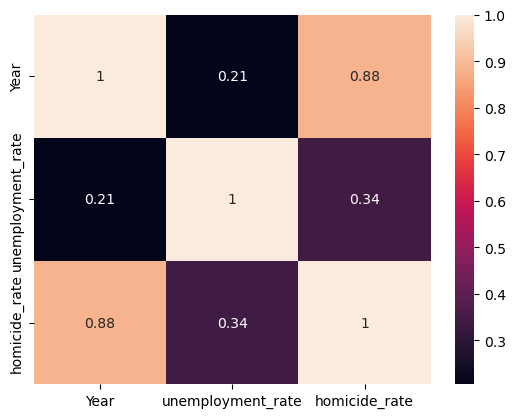

Argentina


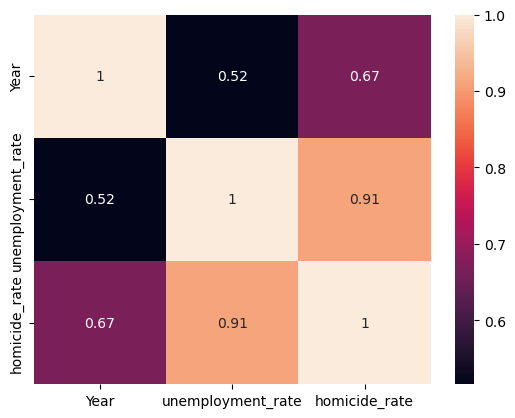

Chile


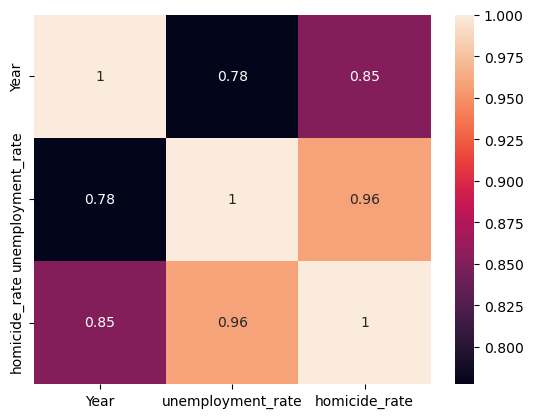

Haiti


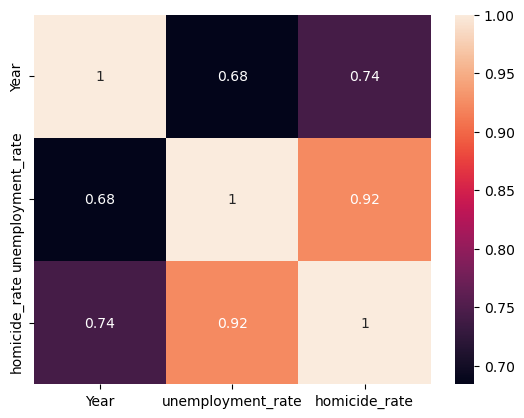

Peru


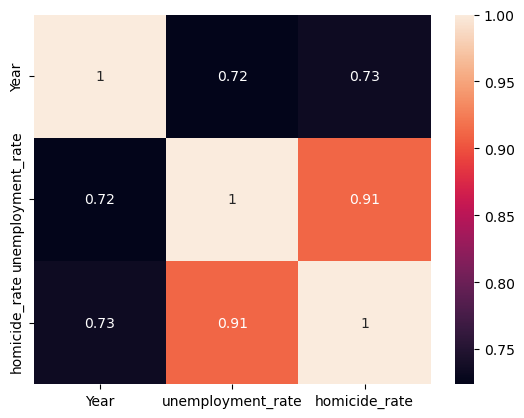

Bolivia


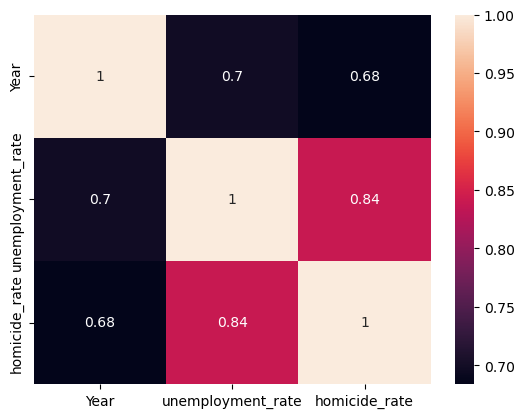

In [34]:
df = final_data
for i in df['Entity'].unique():
    x = df[df['Entity'] == i]
    print(i)
    corr = x.select_dtypes('number').corr()
    sns.heatmap(corr, annot=True)
    plt.show()

## Appending geo data to the final data

Downloaded the topojson files for North and South America from https://github.com/myethiopia/NaturalEarth/tree/master/region_un/TopoJSON

In [35]:
geo_data = gpd.read_file('data/source/region_un_Americas_subunits.topojson')
# geo_data = gpd.read_file('data/source/Americas_geodata.json')

Plotting the topojson file for the geo spatial sketch of North and Latin Americas

Text(0.5, 1.0, 'North and Latin America')

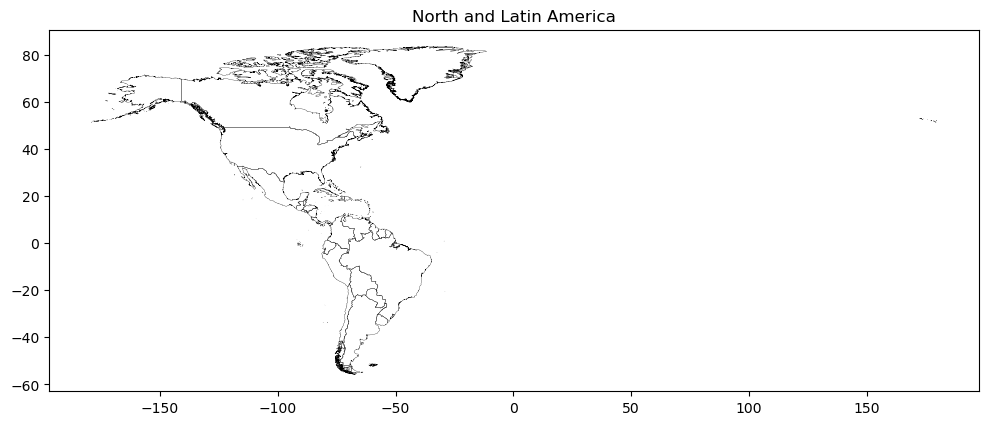

In [36]:
f, ax = plt.subplots(figsize=(12, 12))
geo_data.plot(ax=ax, color='none', linewidth=0.2)
ax.set_title("North and Latin America")

In [37]:
geo_data.head()

,id,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,...,continent,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,geometry
0,NaN,3,Admin-0 map subunit,5,Netherlands,NL1,1,2,Country,Aruba,...,North America,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,"POLYGON ((-69.99692 12.57750, -69.93656 12.531..."
1,NaN,3,Admin-0 map subunit,8,Antigua and Barbuda,ATG,0,3,Geo unit,Antigua and Barbuda,...,North America,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,-99,"POLYGON ((-61.88338 17.04894, -61.87911 17.060..."
2,NaN,3,Admin-0 map subunit,8,Antigua and Barbuda,ATG,0,3,Geo unit,Antigua and Barbuda,...,North America,Americas,Caribbean,Latin America & Caribbean,7,7,5,-99,-99,"POLYGON ((-61.83905 17.59326, -61.85187 17.586..."
3,NaN,3,Admin-0 map subunit,6,United Kingdom,GB1,1,2,Dependency,Anguilla,...,North America,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,"MULTIPOLYGON (((-63.03765 18.21297, -63.09961 ..."
4,NaN,0,Admin-0 map subunit,2,Argentina,ARG,0,2,Sovereign country,Argentina,...,South America,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,"MULTIPOLYGON (((-68.65410 -54.88616, -68.64235..."


In [38]:
geo_data.dtypes

id             float64
scalerank        int64
featurecla      object
labelrank        int64
sovereignt      object
                ...   
long_len         int64
abbrev_len       int64
tiny             int64
homepart         int64
geometry      geometry
Length: 65, dtype: object

Filter the topojson file for only necessary columns to be mapped with final dataset

In [39]:
geo_data = geo_data[[ 'name', 'geometry']]

In [40]:
geo_data['name'] = geo_data['name'].replace('St-Barth�lemy', 'St-Barthelemy')
geo_data['name'] = geo_data['name'].replace('Cura�ao', 'Curacao')
geo_data['name'] = geo_data['name'].replace('Gal�pagos Is.', 'Galapagos Is.')
geo_data['name'] = geo_data['name'].replace('Dominican Rep.', 'Dominican Republic')
# geo_data['name'] = geo_data['name'].replace('U.S.A.', 'United States')
# geo_data['name'] = geo_data['name'].replace('Alaska', 'United States')

In [41]:
geo_data.head()

,name,geometry
0,Aruba,"POLYGON ((-69.99692 12.57750, -69.93656 12.531..."
1,Antigua,"POLYGON ((-61.88338 17.04894, -61.87911 17.060..."
2,Barbuda,"POLYGON ((-61.83905 17.59326, -61.85187 17.586..."
3,Anguilla,"MULTIPOLYGON (((-63.03765 18.21297, -63.09961 ..."
4,Argentina,"MULTIPOLYGON (((-68.65410 -54.88616, -68.64235..."


In [42]:
country1 = geo_data[geo_data['name'] == 'Trinidad']
country2 = geo_data[geo_data['name'] == 'Tobago']

merged_geometry = country1.geometry.unary_union.union(country2.geometry.unary_union)

new_country = gpd.GeoDataFrame(geometry=[merged_geometry])
new_country["name"] = "Trinidad and Tobago"

In [43]:
country3 = geo_data[geo_data['name'] == 'U.S.A.']
country4 = geo_data[geo_data['name'] == 'Alaska']

merged_geometry1 = country3.geometry.unary_union.union(country4.geometry.unary_union)

new_country1 = gpd.GeoDataFrame(geometry=[merged_geometry1])
new_country1["name"] = "United States"

In [44]:
geo_data = pd.concat([geo_data,new_country,new_country1])

In [45]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 67 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      67 non-null     object  
 1   geometry  67 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.6+ KB


In [46]:
geo_data = geo_data[~geo_data['name'].isin(['Trinidad','Tobago','Alaska','U.S.A.'])] 

In [47]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 63 entries, 0 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      63 non-null     object  
 1   geometry  63 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.5+ KB


## Merging the data
Merge the final data and geo data

Filter out rows containing France and Netherlands as they are a part of Europe 

Drop the **admin** column as we no longer need it

In [48]:
dgf_merged = geo_data.merge(final_data, left_on='name', right_on='Entity', how='inner').copy()

In [49]:
dgf_merged = dgf_merged.drop(['name'], axis=1).copy()

In [50]:
dgf_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geometry           868 non-null    geometry
 1   Entity             868 non-null    object  
 2   Region             868 non-null    object  
 3   Year               868 non-null    int32   
 4   unemployment_rate  868 non-null    float64 
 5   homicide_rate      868 non-null    float64 
dtypes: float64(2), geometry(1), int32(1), object(2)
memory usage: 37.4+ KB


In [51]:
dgf_merged['Entity'].nunique()

28

In [52]:
dgf_merged.to_file('data/output/final_data.geojson', driver='GeoJSON')